In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy import unique
from numpy import where
from sklearn.preprocessing import StandardScaler

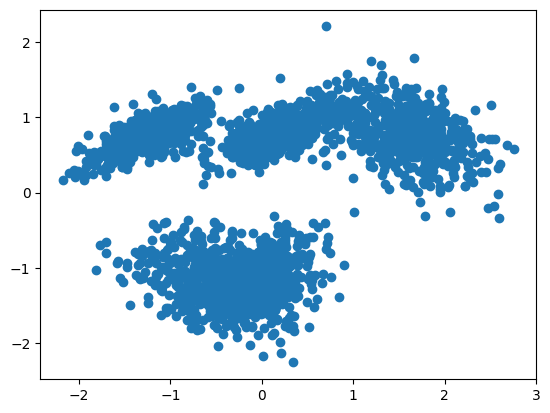

In [74]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/clusters/clust03.csv')
df=StandardScaler().fit_transform(df)
plt.scatter(df[:,0], df[:,1])
plt.show()

# K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


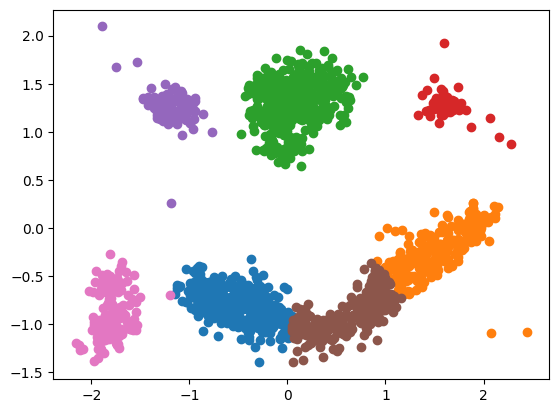

In [63]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7)
clustnum=model.fit_predict(df)
clusters = unique(clustnum)
for cluster in clusters:
 row = where(clustnum == cluster)
 plt.scatter(df[row, 0], df[row, 1])
plt.show()


# EM (Gaussian Mixture Model)

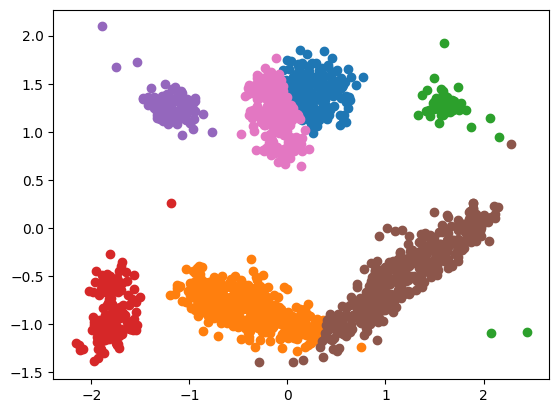

In [64]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=7)
clustnum = model.fit_predict(df)
clusters = unique(clustnum)
for cluster in clusters:
 row = where(clustnum == cluster)
 plt.scatter(df[row, 0], df[row, 1])
plt.show()

# Иерархическая кластеризация

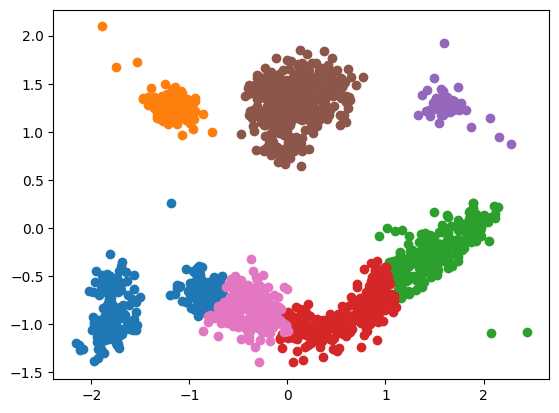

In [65]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=7, linkage='complete')
clustnum = model.fit_predict(df)
clusters = unique(clustnum)
for cluster in clusters:
 row = where(clustnum == cluster)
 plt.scatter(df[row, 0], df[row, 1])
plt.show()

# DBSCAN

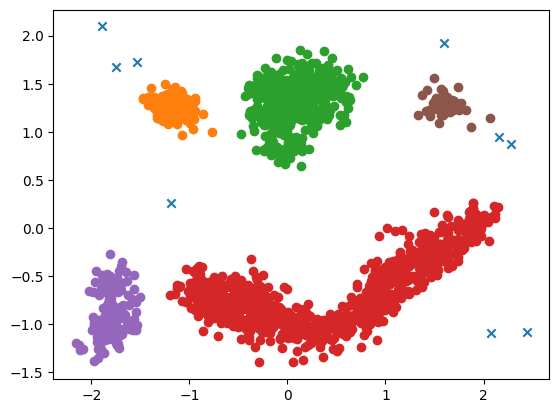

In [67]:
from sklearn.cluster import DBSCAN
model = model = DBSCAN(eps=0.3, min_samples=15)
clustnum = model.fit_predict(df)
clusters = unique(clustnum)
for cluster in clusters:
 row = where(clustnum == cluster)
 plt.scatter(df[row, 0], df[row, 1], marker="x" if cluster<0 else "o" )
plt.show()

# Число кластеров

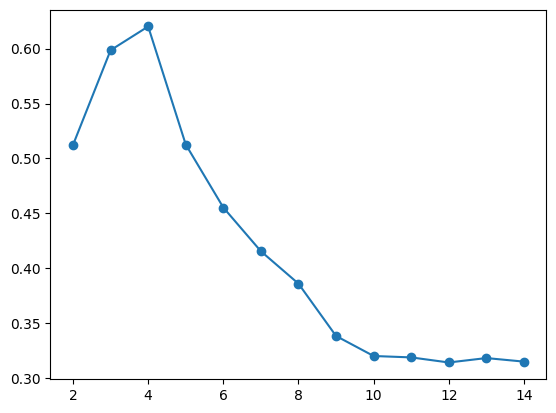

In [76]:
from sklearn.metrics import silhouette_score
clusters=[]
scores=[]

k_values_to_try = range(2, 15)
for cluster in k_values_to_try:

    model = KMeans(n_clusters=cluster)
    clustnum = model.fit_predict(df)

    clusters.append(cluster)
    scores.append(silhouette_score(df, clustnum))

plt.plot(clusters, scores)
plt.scatter(clusters, scores)
plt.show()